In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from seaborn import set_style
from sklearn.metrics import mean_squared_error 

In [50]:
df = pd.read_csv('/Users/gautam/Desktop/Erdos project repo/fall-2025-forecasting-electricity-price/src/data/datasets/state_electricity_price.csv')

In [51]:
df.head(20)

,period,stateid,sectorid,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2016-09,MI,RES,4319629.0,15.71,444.15636,2828.03265,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
1,2016-09,MI,TRA,1.0,11.84,0.04042,0.34151,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
2,2016-09,MN,ALL,2688243.0,10.35,559.27182,5402.25632,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
3,2016-09,MN,COM,293329.0,10.64,207.72416,1952.39722,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
4,2016-09,MN,IND,9006.0,7.12,130.92767,1837.78312,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
5,2016-09,MN,OTH,NaN,NaN,NaN,NaN,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
6,2016-09,MN,RES,2385907.0,13.69,220.41301,1610.19430,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
7,2016-09,MN,TRA,1.0,11.00,0.20698,1.88169,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
8,2016-09,MS,ALL,1526100.0,8.71,410.94949,4717.23847,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours
9,2016-09,MS,COM,233407.0,9.30,134.46800,1445.66363,number of customers,cents per kilowatt-hour,million dollars,million kilowatt hours


In [52]:
df.describe()

,customers,price,revenue,sales
count,6.541000e+04,91450.000000,91450.000000,91450.000000
mean,2.937856e+06,9.505053,602.643460,6008.184978
std,1.209951e+07,5.219185,2230.715403,21415.391640
min,0.000000e+00,0.000000,-0.000010,0.000000
25%,4.937250e+03,6.720000,30.034287,288.611040
50%,3.031045e+05,8.970000,124.210015,1451.356100
75%,2.039146e+06,11.630000,431.681790,4357.975288
max,1.651483e+08,116.670000,58544.155700,406989.403690


In [53]:
STATES= [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY",
]

STATES.sort()

In [54]:
df = df[(df["sectorid"] == "RES") & (df["stateid"].isin(STATES))].copy()
df = df.dropna(subset=["period", "price"]).sort_values(["stateid", "period"])
df["period"] = pd.to_datetime(df["period"], format="%Y-%m", errors="coerce")
df = df.dropna(subset=["period", "price"])

In [47]:
import warnings
warnings.filterwarnings(
    "ignore",
    message=".*force_all_finite.*",
    category=FutureWarning,
    module="sklearn"
)

The following SARIMA model is CPU heavy to run for every state. It might take 20-30s per state.

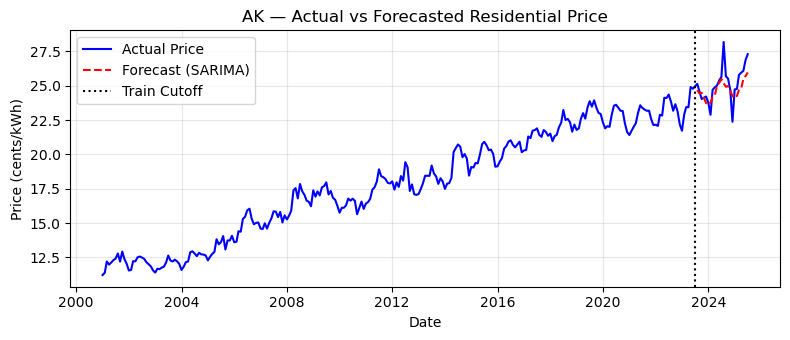

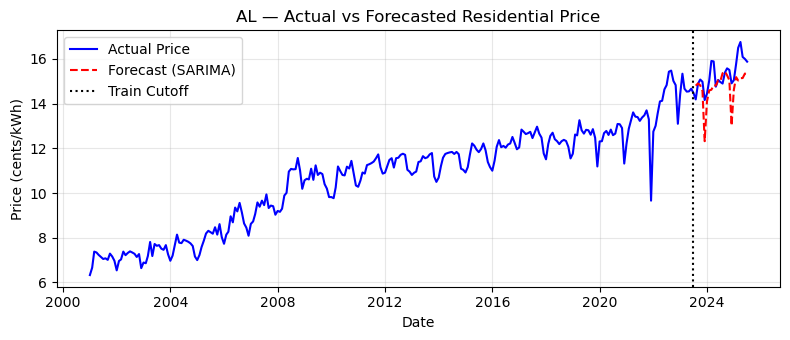

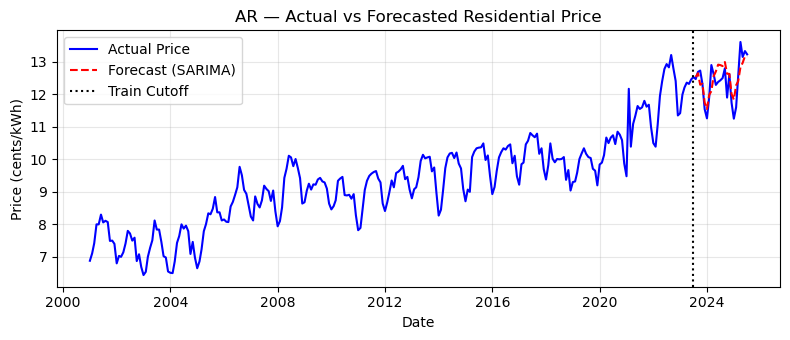

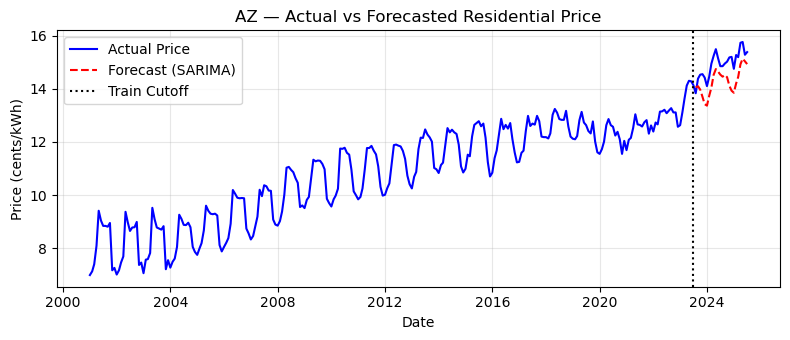

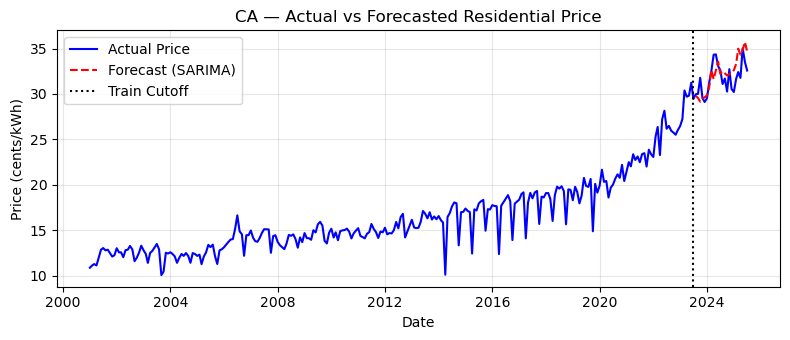

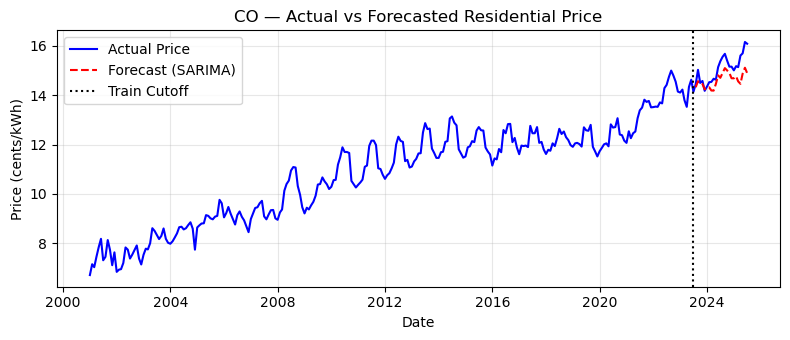

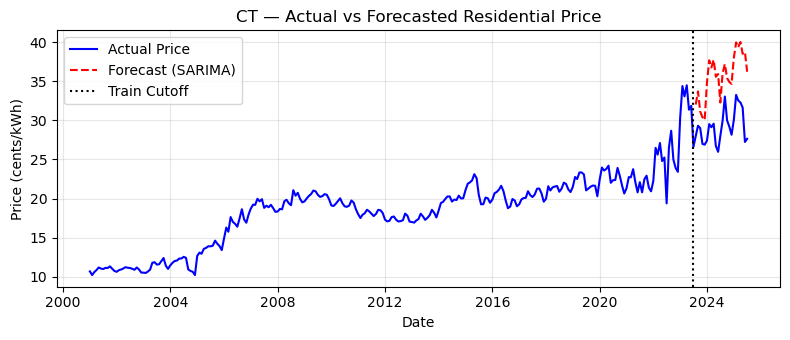

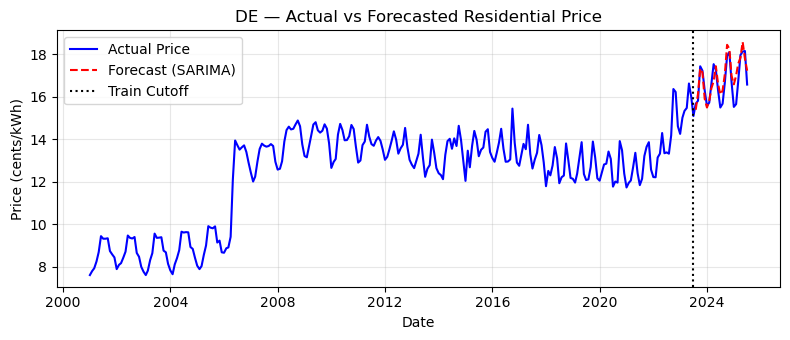

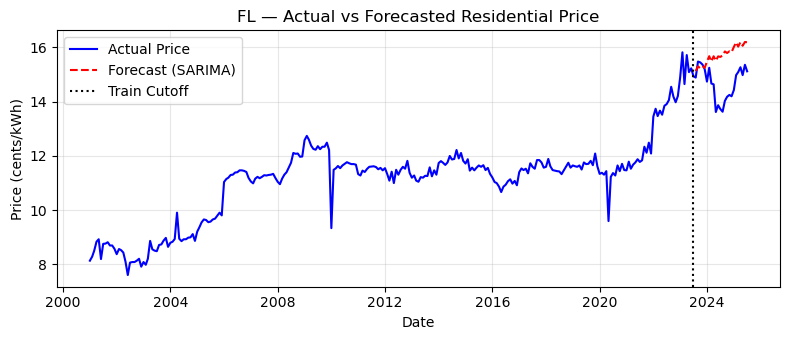

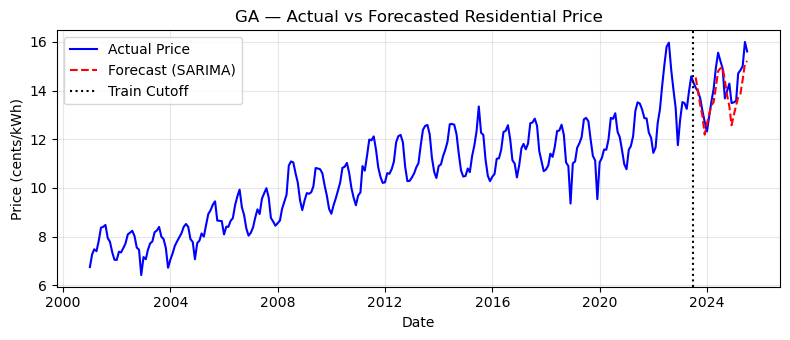

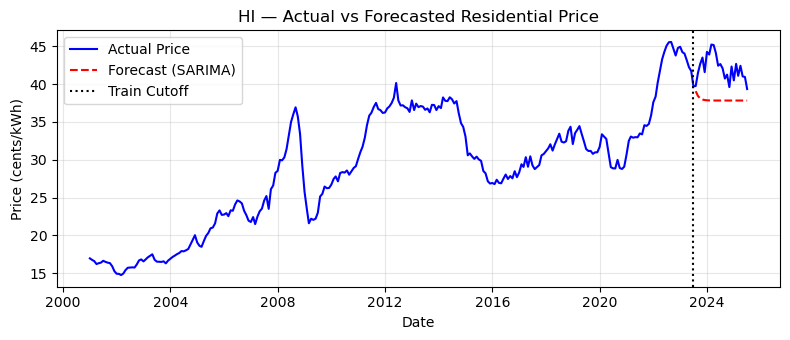

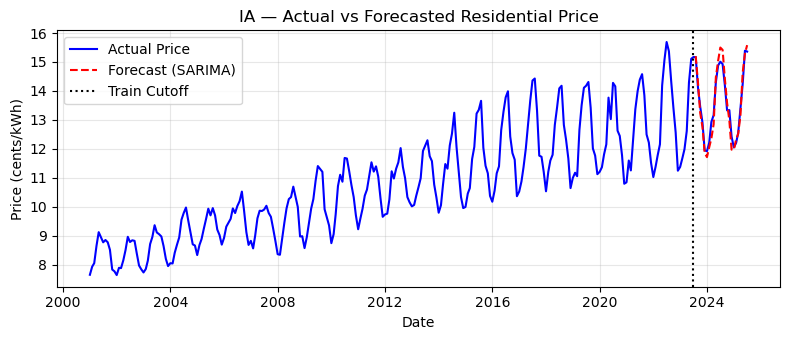

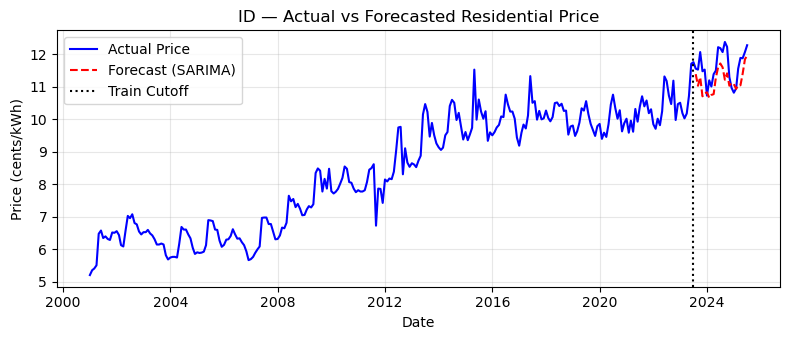

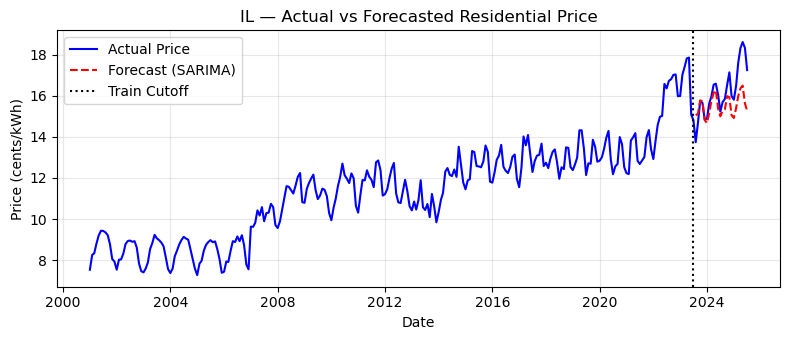

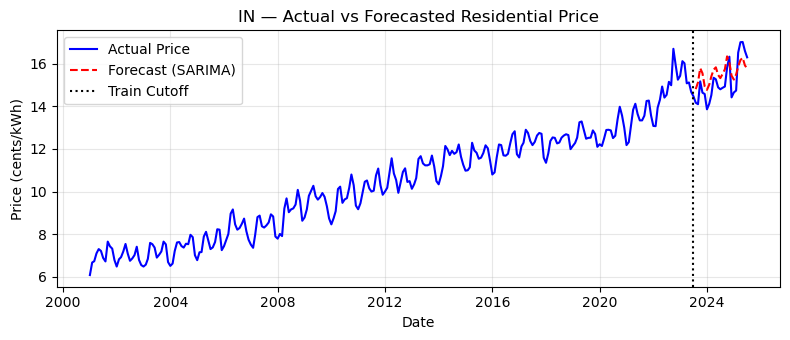

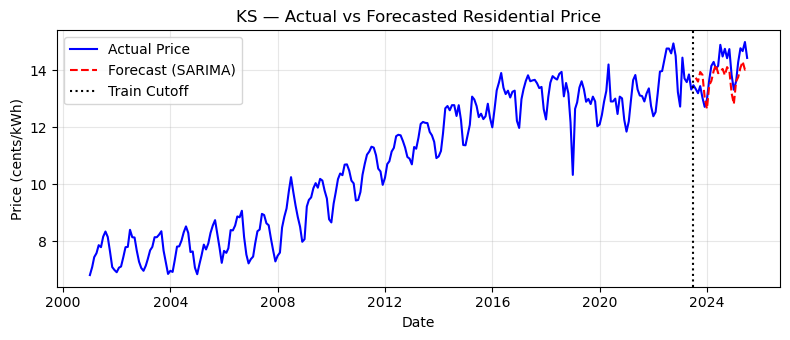

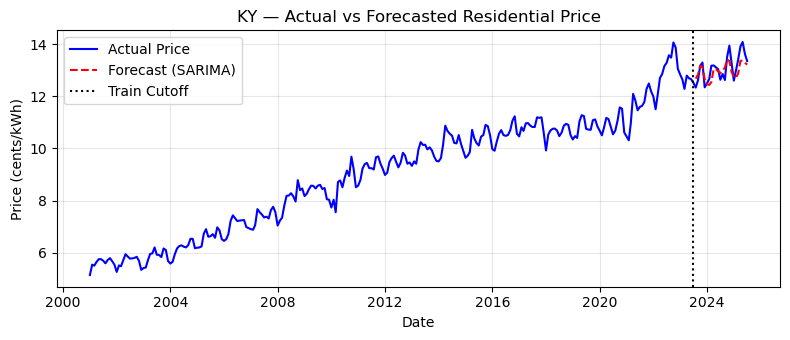

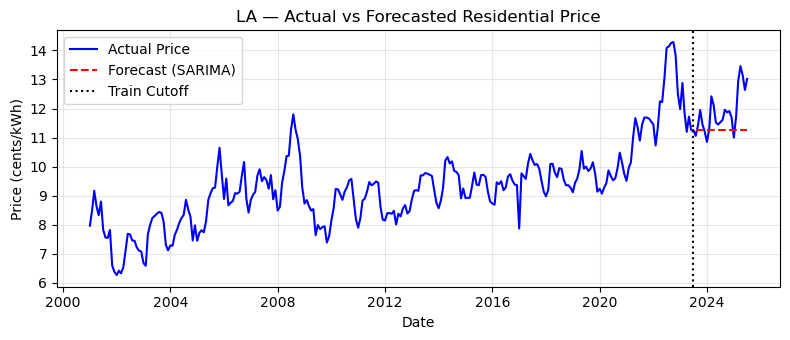

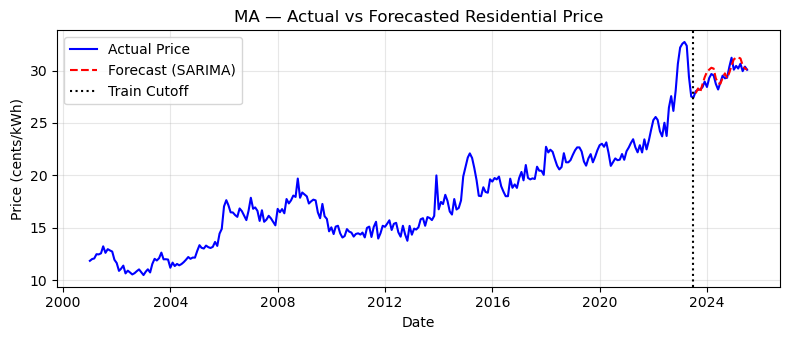

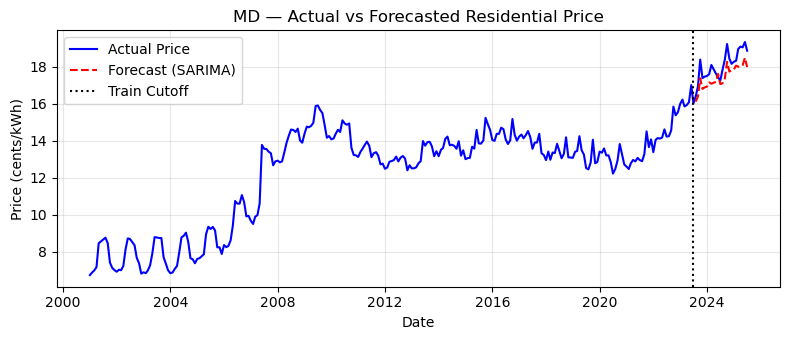

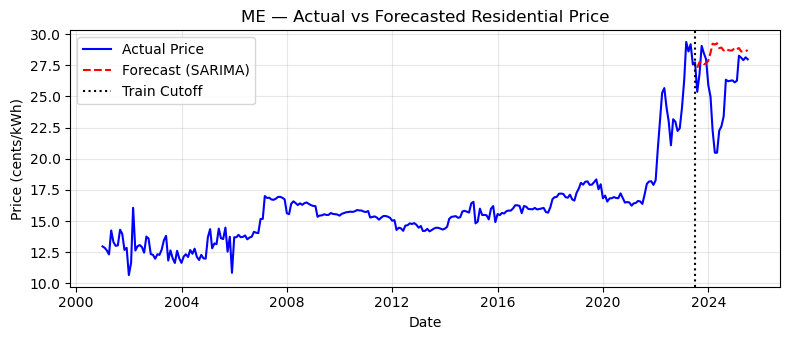

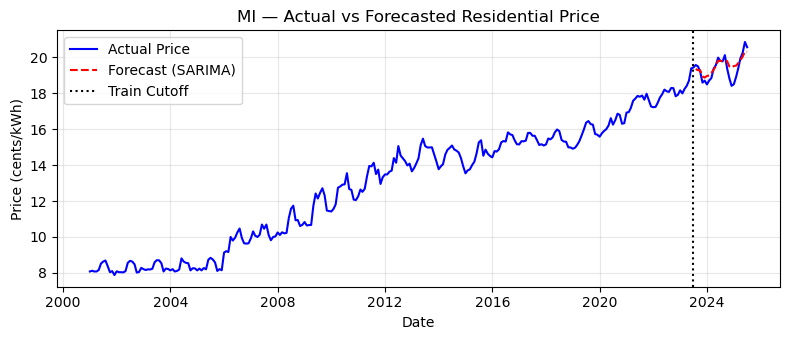

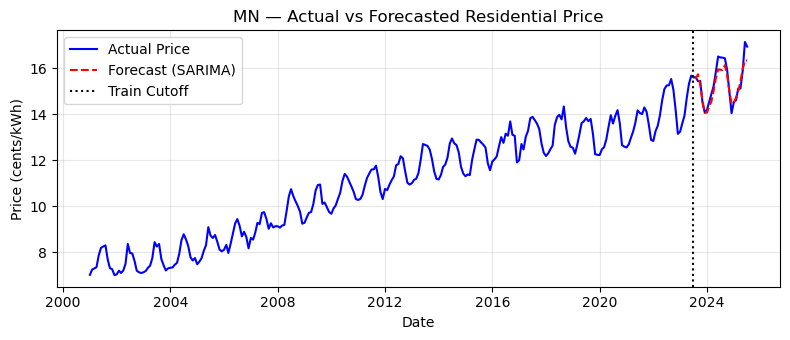

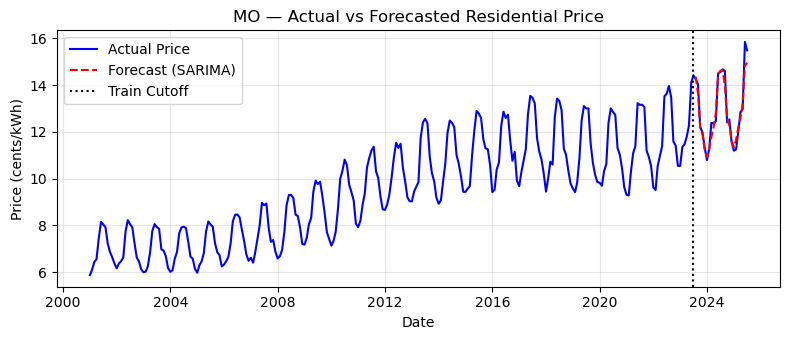

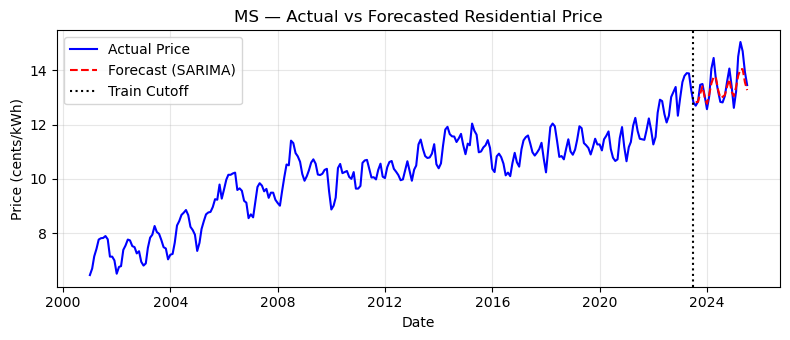

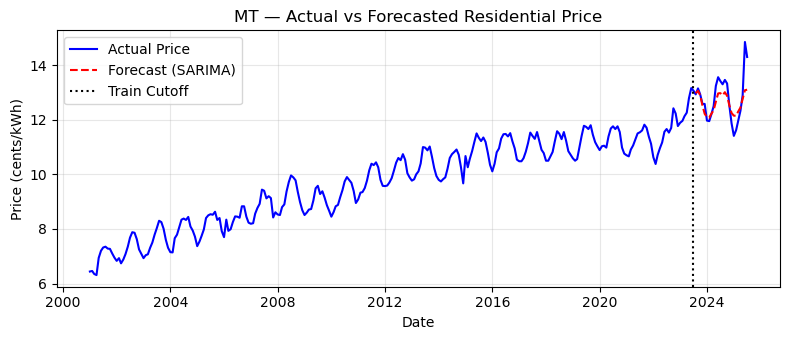

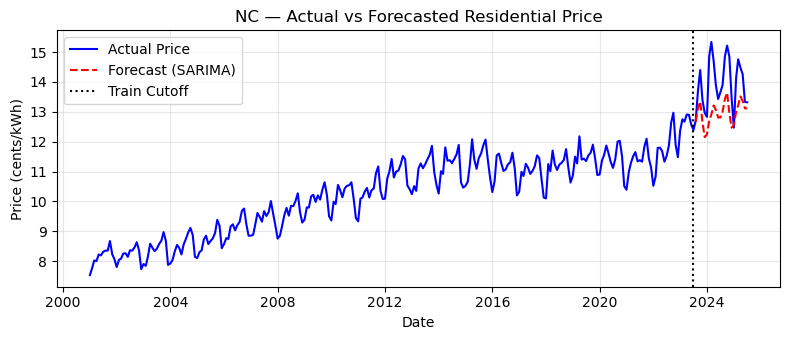

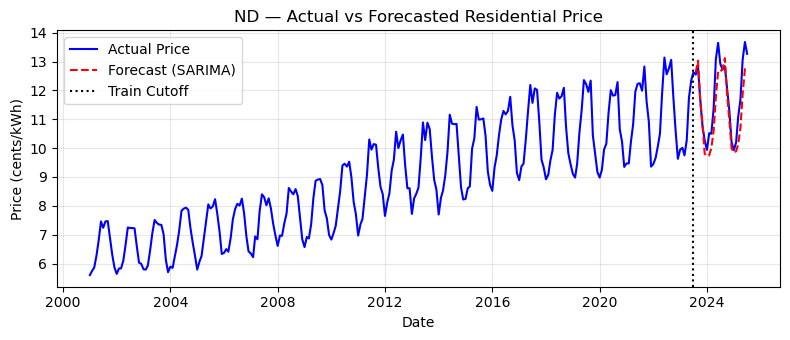

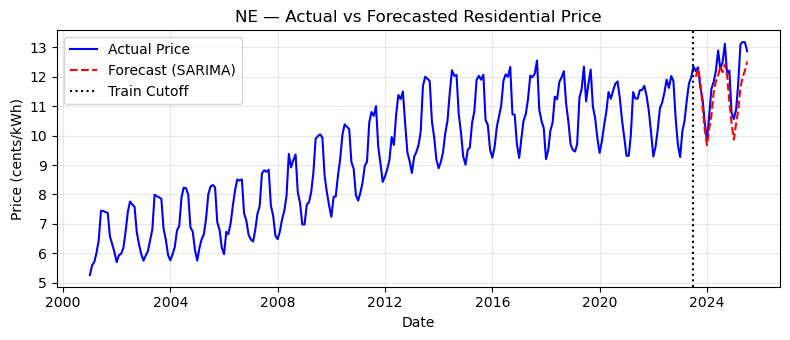

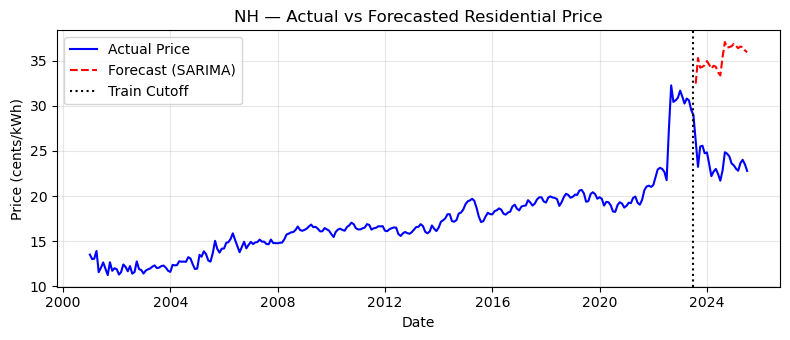

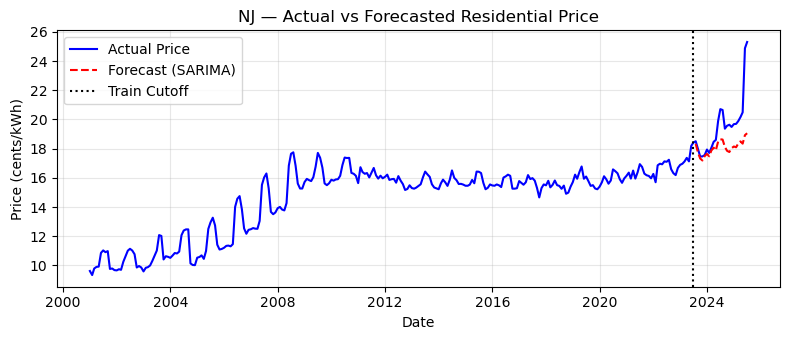

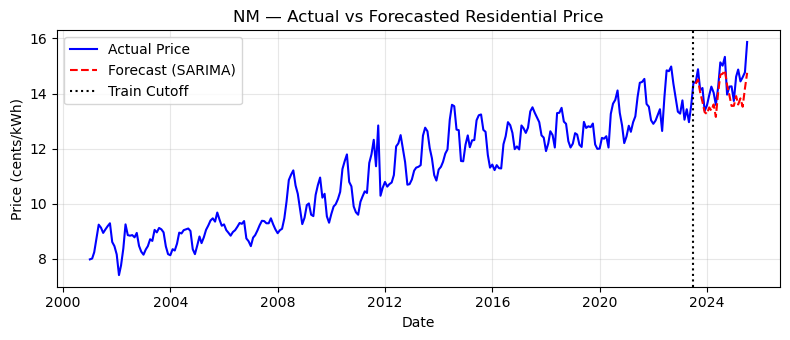

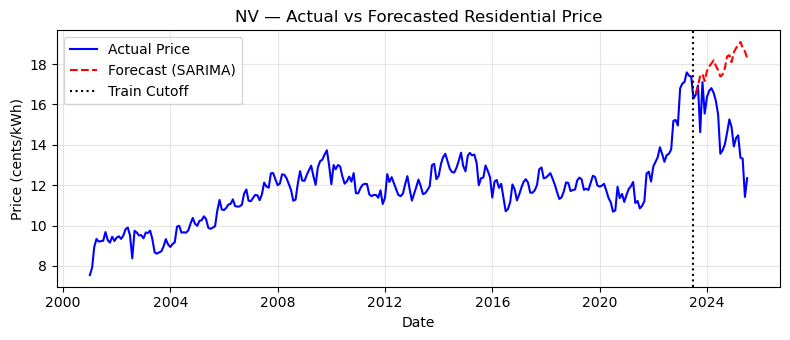

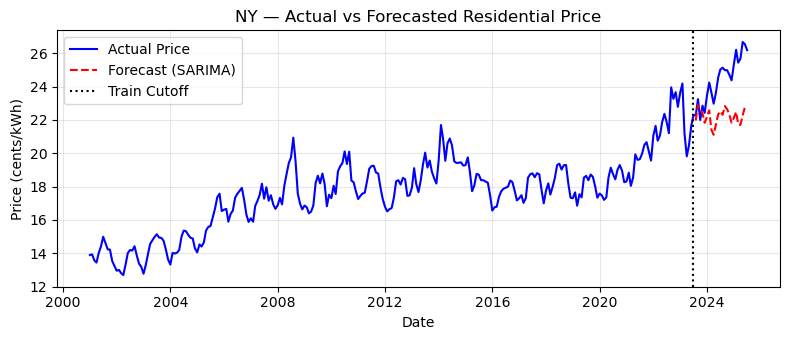

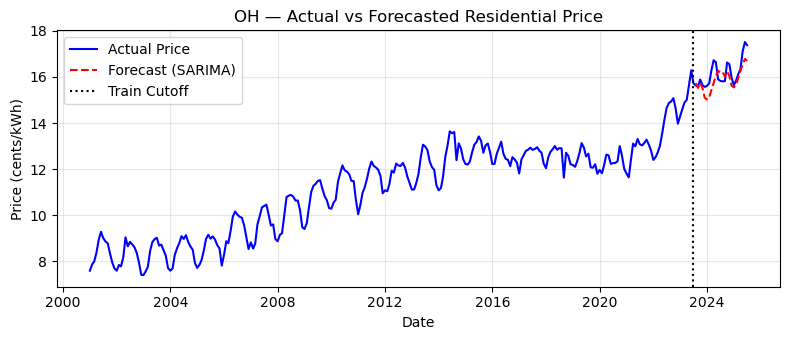

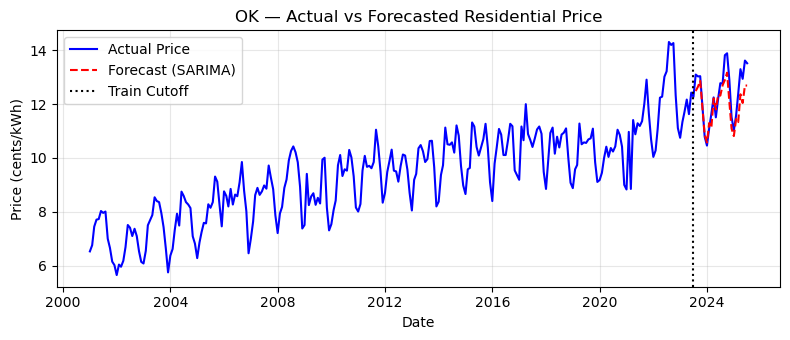

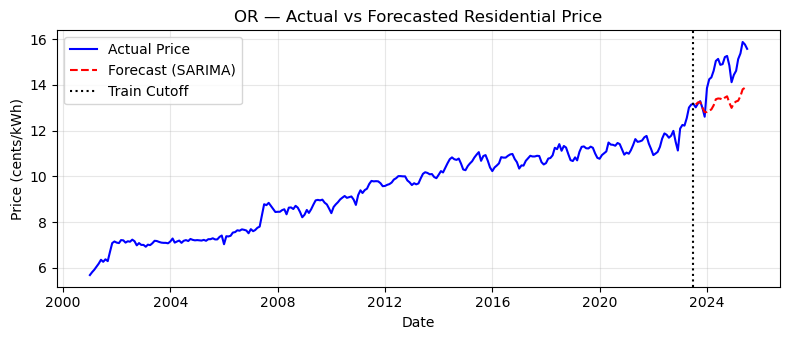

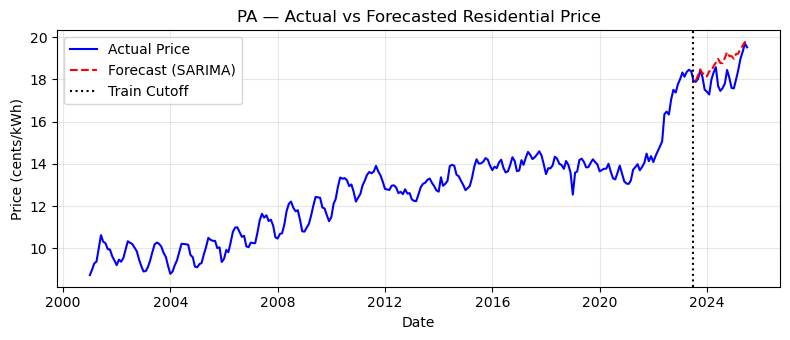

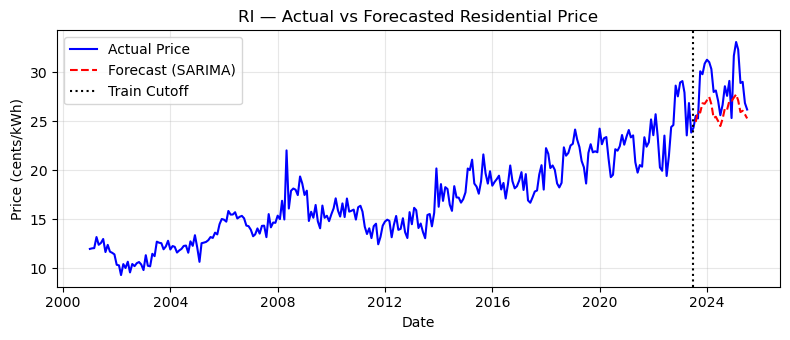

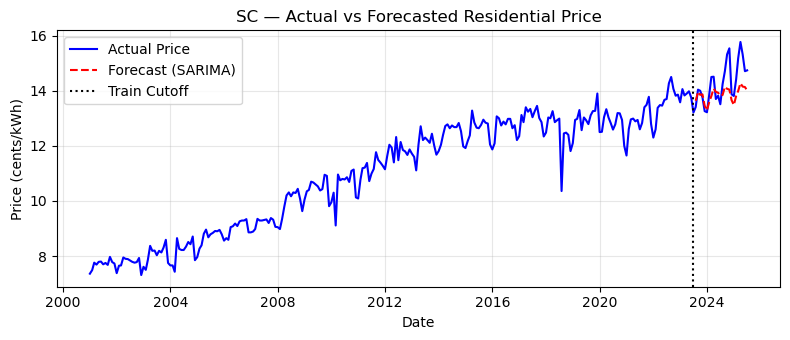

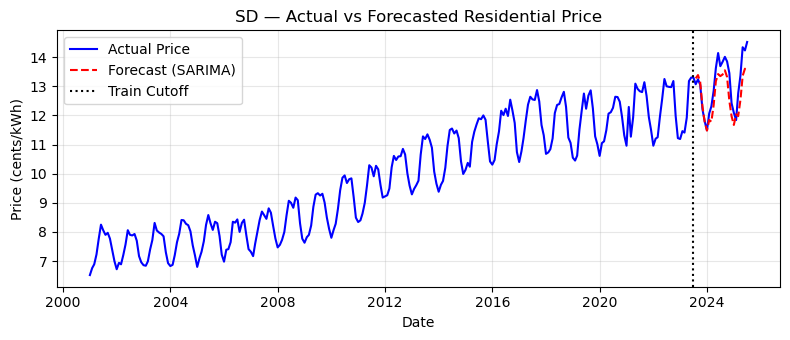

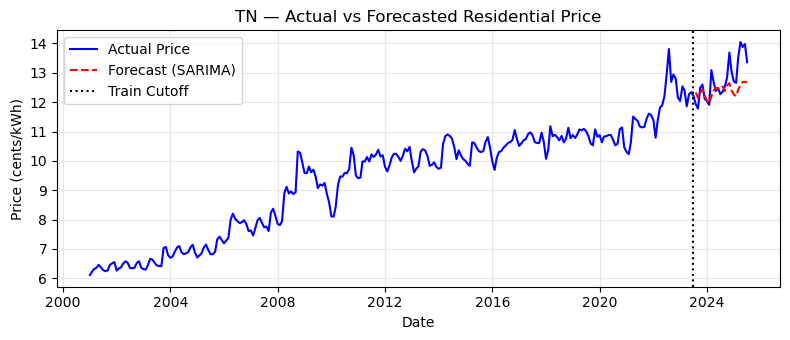

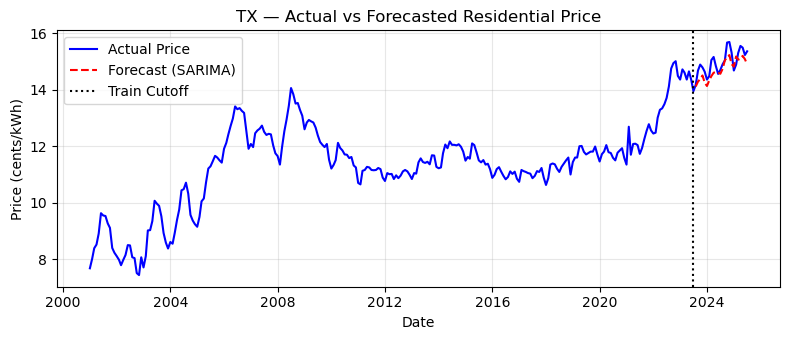

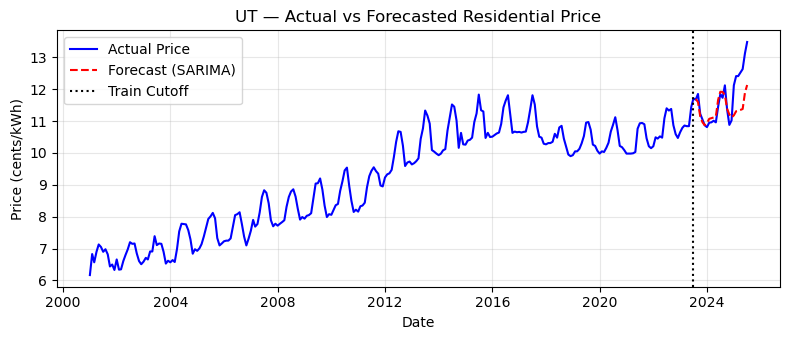

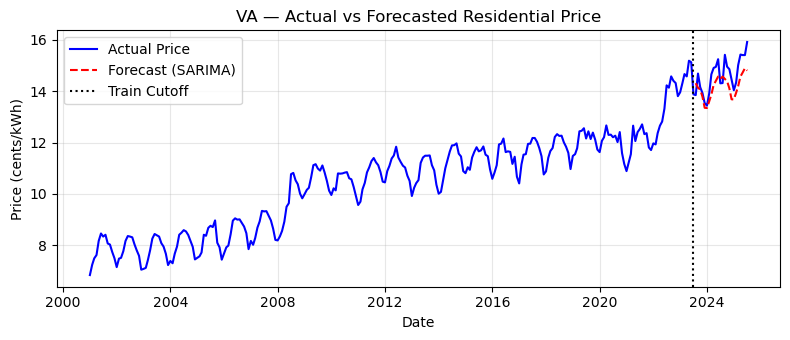

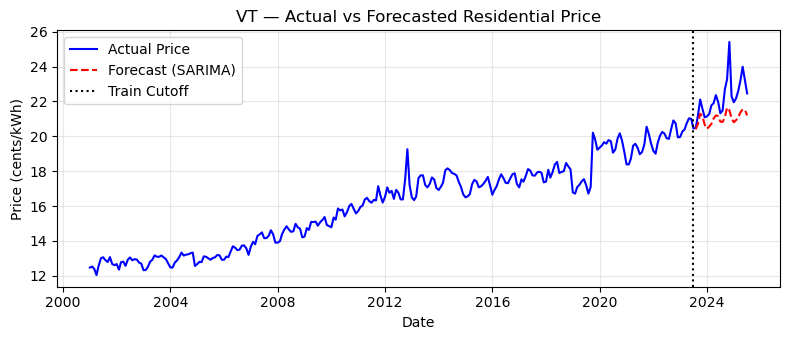

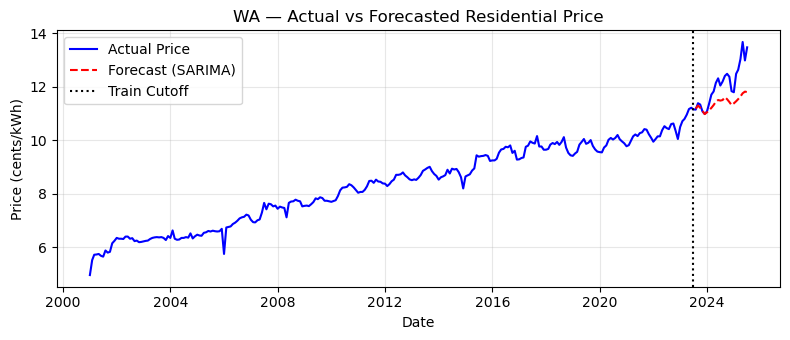

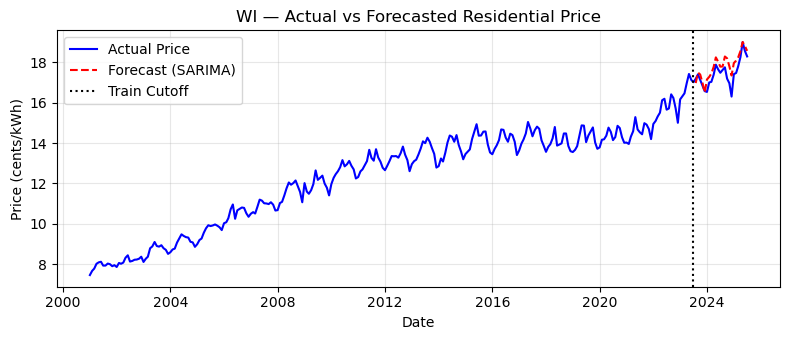

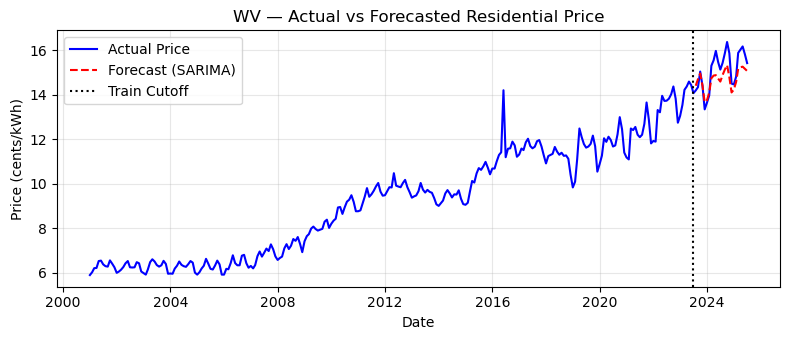

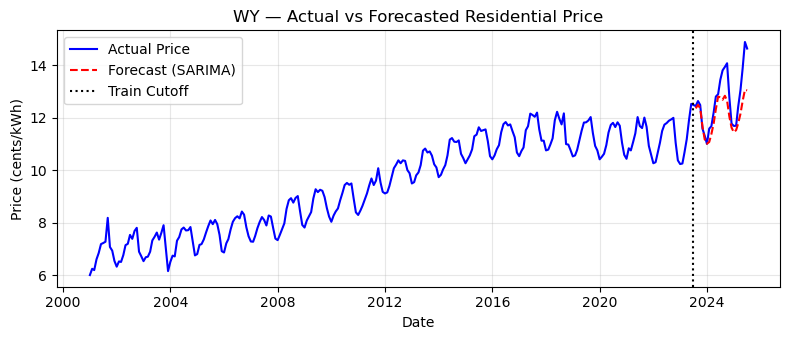

In [55]:
import matplotlib.pyplot as plt
from pmdarima import auto_arima

FORECAST_HORIZON = 24  # 24 months from Aug 2023 to July 2025
TRAIN_CUTOFF = "2023-07-01"

# --- Forecast for each state ---
forecast_results = {}

for state in STATES:
    
    full_state_data = df[df["stateid"] == state].sort_values("period")

    # Training data only up to cutoff
    train_data = full_state_data[full_state_data["period"] <= TRAIN_CUTOFF]

    if train_data.empty:
        print(f"⚠ Skipping {state} (no data before cutoff)")
        continue

    y_train = train_data["price"].values

    # --- Train auto_arima only on train_data ---
    model = auto_arima(
        y_train,
        seasonal=True,
        m=12,
        trace=False,
        error_action="ignore",
        suppress_warnings=True
    )

    # --- Forecast future values ---
    pred = model.predict(FORECAST_HORIZON)

    # Create future date index (monthly)
    last_train_date = train_data["period"].max()
    future_dates = pd.date_range(last_train_date, periods=FORECAST_HORIZON+1, freq="MS")[1:]

    # --- Plot Actual vs Forecast ---
    plt.figure(figsize=(8, 3.5))
    plt.plot(full_state_data["period"], full_state_data["price"], label="Actual Price", color="blue")
    plt.plot(future_dates, pred, label="Forecast (SARIMA)", linestyle="--", color="red")

    # Draw a vertical line marking training cutoff
    plt.axvline(pd.to_datetime(TRAIN_CUTOFF), color="black", linestyle=":", label="Train Cutoff")

    plt.title(f"{state} — Actual vs Forecasted Residential Price")
    plt.xlabel("Date")
    plt.ylabel("Price (cents/kWh)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    


States to reconsider SARIMA moedel: OR, NY, NV, NH, ME, LA, HI, FL, CT